#Fetch data from google drive



In [ ]:
#importing data 
import pandas as pd
import numpy as np
import matplotlib as nlp

In [ ]:
#mounting the google drive to content to the data base
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


Connecting it drive to locate the dataset


In [ ]:
 cd gdrive/MyDrive/Colab Notebooks/Assignment2

/content/gdrive/MyDrive/Colab Notebooks/Assignment2


In [ ]:
import os
print(os.listdir("./Input/train"))
pd.set_option('display.max_columns', 10) #locating the input data folder

['training.1600000.processed.noemoticon.csv']


In [ ]:
tweets = pd.read_csv('./Input/train/training.1600000.processed.noemoticon.csv', engine='python', names=["sentiment", "id", "date", "flag", "user", "tweet"], encoding='latin-1') #obtaining the input data

In [ ]:

displaydata = tweets.sample(n=10)
displaydata

,sentiment,id,date,flag,user,tweet
26764,0,1558905320,Sun Apr 19 09:43:42 PDT 2009,NO_QUERY,kinleyvegas,watching tv. laying down. missing someone.
584210,0,2215199703,Wed Jun 17 17:48:55 PDT 2009,NO_QUERY,redhead094,@wownderful damn . we will figure something ...
889901,4,1687866173,Sun May 03 09:46:57 PDT 2009,NO_QUERY,amysav83,@Karen230683 oh noo..just take it easy
1599103,4,2193345267,Tue Jun 16 08:19:55 PDT 2009,NO_QUERY,grantridley,Going to play . I havn't a clue who i'm playin...
215640,0,1975527962,Sat May 30 15:20:54 PDT 2009,NO_QUERY,krayon88,so much fun stuff going on this weekend when i...
218695,0,1976226061,Sat May 30 16:51:47 PDT 2009,NO_QUERY,mliang87,"First fight is under way, heavyweight bout. Ba..."
1210001,4,1988999761,Mon Jun 01 00:01:26 PDT 2009,NO_QUERY,dhempe,Bangalore Wii Tourney pics in Deccan Herald - ...
1316460,4,2014157168,Wed Jun 03 00:37:53 PDT 2009,NO_QUERY,xxAMGxx,talkin to friends on msn
537692,0,2198845537,Tue Jun 16 16:39:15 PDT 2009,NO_QUERY,Sweet_Honey21,vending machines suck...took my damn dollar
788220,0,2325089619,Thu Jun 25 04:44:43 PDT 2009,NO_QUERY,zeonmusic,New 'The Bird And The Bee' video for 'My Love'...


Upon examamination of the dataset we can conclude that the dataset doesnot have any neutral values

In [ ]:
tweet_refine= tweets[['sentiment','tweet']]
tweet_refine['sentiment']=tweet_refine['sentiment'].replace(4,1) # Replacing 1 for 4 for all positives so the sentiment value is 0=negative, 1=positive
tweet_refine

input_tweet= tweet_refine['tweet']
input_sentiment = tweet_refine['sentiment']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
input_sentiment
for i in range(0, len(input_sentiment)):
  if (i == 1549104):
    print(input_sentiment[i])
    break

1


In [ ]:
from sklearn.model_selection import train_test_split
#spliting the training data into train and test (75/25)
X, xx, y,yy = train_test_split(
   input_tweet, input_sentiment, test_size = 0.9, random_state=42, stratify=input_sentiment) #using 5% of the dataset

train_tweet,test_tweet,train_sentiment,test_sentiment = train_test_split(
   X, y, test_size = 0.2, random_state=42, stratify=y)

# print(train_tweet[:2])
# print(train_sentiment[:4])
# print(test_tweet[:2])
# print(test_sentiment[:4])
# print(len(train_tweet))
# print(len(test_tweet))

#Data Pre-processing



**Remove punctuation:** As seen in the sample of the data set the tweets data contains a lot of @ and other symbols here we have removed punctuations to get rid of these non-letter values

In [ ]:
import re
def remove_punctuation_re(x):
    x = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(x))
    
    return x

train_tweet = [remove_punctuation_re(s) for s in train_tweet]
test_tweet = [remove_punctuation_re(s) for s in test_tweet]

train_tweet[0]

'Is nervous and on edge   '

**Lowecasing:** Lower casing all the tweets

In [ ]:
train_tweet = [s.lower() for s in train_tweet]
test_tweet = [s.lower() for s in test_tweet]

train_tweet[0]

'is nervous and on edge   '

**Tokenization:** Breaking down the sentences into tokens to create a word dictionary

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize


train_tweet_tk = [word_tokenize(s) for s in train_tweet]
test_tweet_tk =  [word_tokenize(s) for s in test_tweet]
train_tweet_tk[0]
# input_tweet_tk =  [word_tokenize(s) for s in input_tweet]
# input_tweet_tk[0]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['is', 'nervous', 'and', 'on', 'edge']

**Stop-word Removal:** Removing words used for sentence formation which do not really weigh on the meaning of the data

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords as sw
from tqdm import tqdm
stop_words = sw.words()

train_tweet_ns=[]
for tokens in tqdm(train_tweet_tk):
    filtered_sentence = [w for w in tokens if not w in stop_words]
    train_tweet_ns.append(filtered_sentence)

test_tweet_ns=[]
for tokens in tqdm(test_tweet_tk):
    filtered_sentence = [w for w in tokens if not w in stop_words]
    test_tweet_ns.append(filtered_sentence)

train_tweet_ns[0]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


100%|██████████| 32000/32000 [00:38<00:00, 831.98it/s]


['nervous', 'edge']

**Stemming:** It is the process of removing a part of a word, or reducing a word to its stem or root word.

In [ ]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

train_tweet_st = []
for tokens in train_tweet_ns:
    stem_sentence = [stemmer.stem(s) for s in tokens]
    train_tweet_st.append(stem_sentence)
test_tweet_st = []
for tokens in test_tweet_ns:
    stem_sentence = [stemmer.stem(s) for s in tokens]
    test_tweet_st.append(stem_sentence)



print(train_tweet_st[3])
print(train_tweet_ns[3])



['ddlovato', 'best', 'ili', 'god', 'bless']
['ddlovato', 'best', 'ily', 'god', 'bless']


#Creating Classification Models

Getting the clean data ready for the classification model

In [ ]:
X_train = []
y_train = []
X_test = []
y_test = []
print('prepearing y_train and test...')
# Train
for s in train_tweet:
  X_train.append(s)
for l in train_sentiment:  
  y_train.append(l)
#Test
for s in test_tweet:
  X_test.append(s)
for l in test_sentiment:  
  y_test.append(l)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(X_train[:10])

prepearing y_train and test...
['is nervous and on edge   ', 'just woke up leaving to go home soon  still tired ', ' dustinlw       so sorry to hear that ', ' ddlovato demi your the best ily god bless ', ' k  logos nope my computer right now is in need of a power supply so im useing an old office machine ', 'text muh babyy      lt    ', 'leave keys in cab   can t get hold of landlord   holiday inn ', 'so i guess im being paid to go to school now ', ' omgitsmonica that s cool  i am glad you have a bike  you should paint things on it   or not  but if it was me  i totally would   ', ' labellavida   yeah i get the  quot secret quot  emails all the time  but i will be in buffalo next thursday ']


In [ ]:
X_train = train_tweet
X_test = test_tweet

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
train_tweet_vec = count_vect.fit_transform(train_tweet)


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_tranform = TfidfTransformer()
train_tweet_tf = tfidf_tranform.fit_transform(train_tweet_vec)


In [ ]:
count_vect_test = CountVectorizer()
test_tweet_vec = count_vect.transform(test_tweet)
test_tweet_tf = tfidf_tranform.transform(test_tweet_vec)



#Hyper Parameter fine-tuning



In [ ]:
# Test set score: 0.75
# Best parameters: {'max_depth': 16, 'n_estimators': 256}
# Best cross-validation score: 0.74
# Best estimator:
# RandomForestClassifier(max_depth=16, n_estimators=256)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define Parameters
max_depth=[2, 8, 16]
n_estimators = [64, 128, 256]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)

# Build the grid search
dfrst = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
grid = GridSearchCV(estimator=dfrst, param_grid=param_grid, cv = 5)
grid_results = grid.fit(train_tweet_vec,train_sentiment)
print("Test set score: {:.2f}".format(grid.score(test_tweet_vec, test_sentiment)))
print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best estimator:\n{}".format(grid.best_estimator_))


KeyboardInterrupt: ignored

In [ ]:
# Test set score: 0.78
# Best parameters: {'C': 0.1, 'penalty': 'l2'}
# Best cross-validation score: 0.78
# Best estimator:
# LogisticRegression(C=0.1)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


param_grid = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, refit = True, verbose = 3)
grid.fit(train_tweet_vec, train_sentiment)
print("Test set score: {:.2f}".format(grid.score(test_tweet_vec, test_sentiment)))
print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best estimator:\n{}".format(grid.best_estimator_))


In [ ]:
# Test set score: 0.78
# Best parameters: {'C': 0.01}
# Best cross-validation score: 0.78
# Best estimator:
# LinearSVC(C=0.01)

from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV


param_grid = {'C': [0.01,0.1,1,10]}
grid = GridSearchCV(LinearSVC(), param_grid, cv=5, refit = True, verbose = 3)
grid.fit(train_tweet_vec, train_sentiment)
print("Test set score: {:.2f}".format(grid.score(test_tweet_vec, test_sentiment)))
print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best estimator:\n{}".format(grid.best_estimator_))

#Defining the classification models


We have implemented the following classification models:
1. Random Forest Classifier
2. Logistic Regression based Classifier
3. Support Vector Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

r_clf = RandomForestClassifier(max_depth=16, random_state=0, n_estimators=256) #all the parameters here are set after fine tunning the models
RF_clf= r_clf.fit(train_tweet_vec, train_sentiment)

log_clf = LogisticRegression(random_state=42, max_iter=10000 , C=0.1,penalty='l2')
LR_clf = log_clf.fit(train_tweet_vec, train_sentiment)

lin_clf = LinearSVC(random_state=0, tol=1e-4, C=0.01)
SVC_clf = lin_clf.fit(train_tweet_vec, train_sentiment)

Saving the vectorizer and the clasification models 

In [ ]:
import pickle
  # Save the vectorizer
vec_file = 'vectorizer.pickle'
pickle.dump(count_vect, open(vec_file, 'wb'))

test_vec_file = 'test_vectorizer.pickle'
pickle.dump(count_vect_test, open(test_vec_file, 'wb'))
    # Save the models
    # Save the models

RF_mod_file = 'RF_classification.model'
pickle.dump(RF_clf, open(RF_mod_file, 'wb'))

LR_mod_file = 'LR_classification.model'
pickle.dump(LR_clf, open(LR_mod_file, 'wb'))

SVC_mod_file = 'SVC_classification.model'
pickle.dump(SVC_clf, open(SVC_mod_file, 'wb'))


#Accuracy on Train Data-set

In [ ]:
    # load the vectorizer
loaded_vectorizer = pickle.load(open('vectorizer.pickle', 'rb'))
    # load the model
loaded_model = pickle.load(open('RF_classification.model', 'rb'))
    # make a prediction
RF_predict= loaded_model.predict(loaded_vectorizer.transform(train_tweet))
train_pred_RF = np.mean(RF_predict == train_sentiment)*100
print('Random Forest Clasification Accuracy on training data:',train_pred_RF)

Random Forest Clasification Accuracy on training data: 76.84218750000001


In [ ]:
# Load the classification model from disk and use for predictions

    # load the vectorizer
loaded_vectorizer = pickle.load(open('vectorizer.pickle', 'rb'))
    # load the model
loaded_model = pickle.load(open('LR_classification.model', 'rb'))
    # make a prediction
LR_predict= loaded_model.predict(loaded_vectorizer.transform(train_tweet))
train_pred_LR = np.mean(LR_predict == train_sentiment)*100
print('Logistic Regression Clasification Accuracy on training data:',np.mean(LR_predict == train_sentiment)*100)


Logistic Regression Clasification Accuracy on training data: 81.24375


In [ ]:
    # load the vectorizer
loaded_vectorizer = pickle.load(open('vectorizer.pickle', 'rb'))
   # load the model
loaded_model = pickle.load(open('SVC_classification.model', 'rb'))
SVC_predict= loaded_model.predict(loaded_vectorizer.transform(train_tweet))
   # make a prediction
train_pred_SVC = np.mean(SVC_predict == train_sentiment)*100
print('Linear Support Vector Clasification Accuracy on training data:',np.mean(SVC_predict == train_sentiment)*100)


Linear Support Vector Clasification Accuracy on training data: 81.2828125


#Accuracy of Test Data-set

In [ ]:
from sklearn.metrics import classification_report
loaded_vectorizer = pickle.load(open('vectorizer.pickle', 'rb'))
   # load the model
loaded_model = pickle.load(open('RF_classification.model', 'rb'))
    # load a prediction
RF_predict= loaded_model.predict(loaded_vectorizer.transform(test_tweet))
test_pred_RF=np.mean(RF_predict == test_sentiment)*100
print(classification_report(RF_predict, test_sentiment))
print('RF Clasification Accuracy on testing data:',np.mean(RF_predict == test_sentiment)*100)

              precision    recall  f1-score   support

           0       0.72      0.76      0.74     15063
           1       0.78      0.73      0.75     16937

    accuracy                           0.75     32000
   macro avg       0.75      0.75      0.75     32000
weighted avg       0.75      0.75      0.75     32000

RF Clasification Accuracy on testing data: 74.715625


In [ ]:
from sklearn.metrics import classification_report
    # load the vectorizer
loaded_vectorizer = pickle.load(open('vectorizer.pickle', 'rb'))
   # load the model
loaded_model = pickle.load(open('LR_classification.model', 'rb'))
    # load a prediction
LR_predict= loaded_model.predict(loaded_vectorizer.transform(test_tweet))
test_pred_LR=np.mean(LR_predict == test_sentiment)*100
print(classification_report(LR_predict, test_sentiment))
print('Logistic Regression Clasification Accuracy on testing data:',np.mean(LR_predict == test_sentiment)*100)

              precision    recall  f1-score   support

           0       0.76      0.80      0.78     15349
           1       0.80      0.77      0.79     16651

    accuracy                           0.78     32000
   macro avg       0.78      0.78      0.78     32000
weighted avg       0.79      0.78      0.78     32000

Logistic Regression Clasification Accuracy on testing data: 78.434375


In [ ]:
from sklearn.metrics import classification_report
   # load the vectorizer
loaded_vectorizer = pickle.load(open('vectorizer.pickle', 'rb'))
   # load the model
loaded_model = pickle.load(open('SVC_classification.model', 'rb'))
SVC_predict= loaded_model.predict(loaded_vectorizer.transform(test_tweet))
   # make a prediction
test_pred_SVC=np.mean(SVC_predict == test_sentiment)*100
print(classification_report(SVC_predict, test_sentiment))
print('Linear Support Vector Clasification Accuracy on testing data:',test_pred_SVC)

              precision    recall  f1-score   support

           0       0.76      0.80      0.78     15241
           1       0.81      0.77      0.79     16759

    accuracy                           0.78     32000
   macro avg       0.78      0.79      0.78     32000
weighted avg       0.79      0.78      0.78     32000

Linear Support Vector Clasification Accuracy on testing data: 78.465625


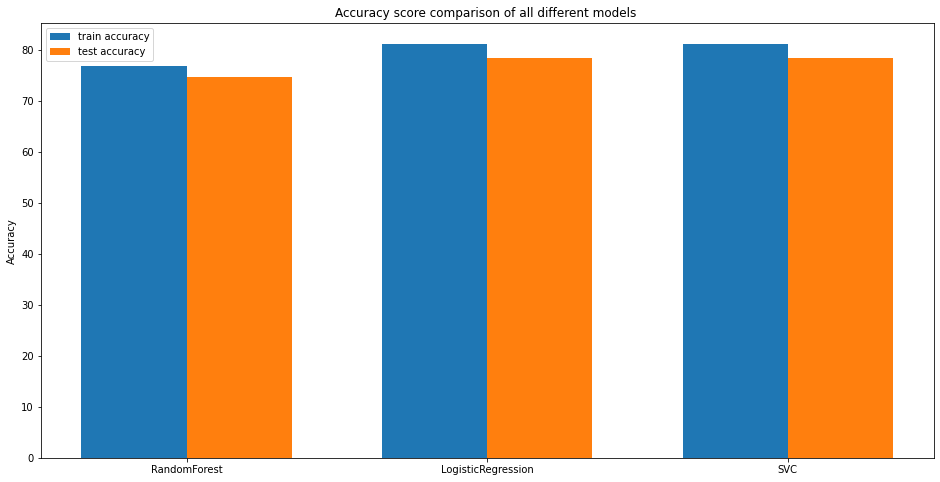

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# set width of bar
#barWidth = 0.25

train_accuracies = [train_pred_RF,train_pred_LR,train_pred_SVC]
test_accuracies  = [test_pred_RF,test_pred_LR,test_pred_SVC]

labels = ['RandomForest', 'LogisticRegression','SVC']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rec1 = ax.bar(x - width/2, train_accuracies, width, label='train accuracy')
rec2 = ax.bar(x + width/2, test_accuracies, width, label='test accuracy')


ax.set_ylabel('Accuracy')
ax.set_title('Accuracy score comparison of all different models ')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='best')

plt.gcf().set_size_inches(16, 8)
plt.show()

In [ ]:
import torch
# mount to my drive
import pandas as pd
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)



Mounted at /content/gdrive


In [ ]:
# save model
svc_model = 'drive/My Drive/svc_classification.pt'
print('Saving to', svc_model)


Saving to drive/My Drive/svc_classification.pt


In [ ]:
print('Best accuracy score on test data is obtained using SVC with score of:',Y_pred)